In [288]:
import seaborn as sns
import os 
import numpy as np 
import pandas as pd 
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt
import pathlib as path
from scipy import stats

In [289]:
#PATH_TO_DATA = path.Path(r'C:\Users\User\Desktop\visualpilot')
PATH_TO_DATA = path.Path.cwd().parent / 'data' 
all_directories_paths = [x[0] for x in os.walk(PATH_TO_DATA) if 'batch' in x[0].split('\\')[-1] ]


In [299]:

filename = 'one_line_per_participant_all_info_valid_subjects_only.csv'
all_valid_subjects = pd.DataFrame([])
for batch in all_directories_paths:
    time_gap = path.Path(batch).parent.name
    PATH_PROCESED = batch/path.Path(filename)
    file = pd.read_csv(PATH_PROCESED,index_col=0)
    file['time_gap'] = time_gap
    file['worker_ID'] = file.index 
    file['batch_number'] = int(path.Path(batch).name.split(' ')[-1])
    
    all_valid_subjects = pd.concat([all_valid_subjects,file])


In [312]:
df_same_target_pictures = all_valid_subjects.loc[((all_valid_subjects['time_gap'] == 'pilot_same_day') & (all_valid_subjects['batch_number'] > 5)) | (all_valid_subjects['time_gap'] == 'pilot_24_hours')]

In [327]:
df_same_target_pictures['time_gap'].value_counts()

pilot_same_day    23
pilot_24_hours    16
Name: time_gap, dtype: int64

In [321]:
df_same_target_pictures.to_csv(r'C:\Users\User\Desktop\visualpilot2\Visual-memory-task\analysis\total_data.csv')

lets check if there are duplicate subject names , if so we drop one of there rows 

In [293]:
print(f'there are {len(all_valid_subjects.index) - len(set(all_valid_subjects.index))}, duplicate subjects')

there are 1, duplicate subjects


In [294]:
#dup_subject_name = all_valid_subjects[all_valid_subjects.index.value_counts() > 1].index[0]
id = np.where(all_valid_subjects['worker ID']== 'A2JLNOYPVW7W4V')[0][1]

all_valid_subjects = all_valid_subjects.reset_index(drop=True)
all_valid_subjects.drop([id],inplace=True)
all_valid_subjects = all_valid_subjects.set_index('worker ID')
all_valid_subjects['worker_ID'] = all_valid_subjects.index

In [318]:


rt_df = pd.melt(df_same_target_pictures,id_vars=['worker_ID','time_gap'],value_vars=['testing_layer_1_rt','testing_layer_2_rt','testing_layer_3_rt'],var_name='layer')

accuracy_df = pd.melt(df_same_target_pictures,id_vars=['worker_ID','time_gap'],value_vars=['testing_layer_1_accuracy','testing_layer_2_accuracy','testing_layer_3_accuracy'],var_name='layer')

Text(0.5, 0.98, 'Memory preformance')

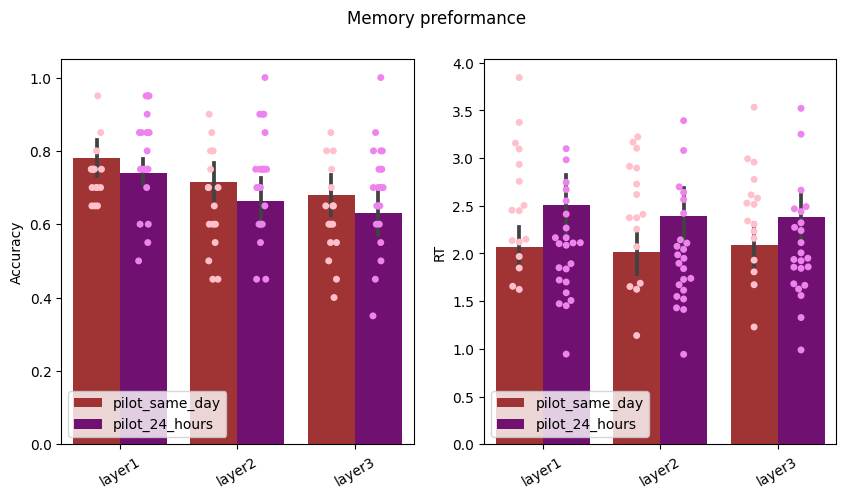

In [323]:


my_order = ['pilot_same_day','pilot_24_hours']

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.barplot(data =accuracy_df, x='layer',y='value',hue='time_gap',ax=axes[0],palette={'pilot_24_hours':'purple','pilot_same_day':'firebrick'},hue_order=my_order)
sns.stripplot(data =accuracy_df, x='layer',y='value',hue='time_gap',ax=axes[0],dodge=True,palette={'pilot_24_hours':'pink','pilot_same_day':'violet'},jitter=True)
axes[0].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[0].set_xlabel('')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[2:],labels[2:],loc='lower left')


axes[0].set_ylabel('Accuracy')

sns.barplot(data =rt_df, x='layer',y='value',hue='time_gap',ax=axes[1],palette={'pilot_24_hours':'purple','pilot_same_day':'firebrick'},hue_order=my_order)
sns.swarmplot(data =rt_df, x='layer',y='value',hue='time_gap',ax=axes[1],palette={'pilot_24_hours':'pink','pilot_same_day':'violet'},dodge=True)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].set_xticklabels(labels=['layer1','layer2','layer3'],rotation=30)
axes[1].legend(handles[2:],labels[2:],loc='lower left')
axes[1].set_ylabel('RT')
axes[1].set_xlabel('')


fig.suptitle('Memory preformance')
